# Crop Production Analysis
I have used the following dataset to visualize crop production in kenya and the rest of Eastern Africa.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("FAOSTAT_data_5-23-2021.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain_code       2427 non-null   object 
 1   Domain            2427 non-null   object 
 2   Area_code         2427 non-null   int64  
 3   Area              2427 non-null   object 
 4   Element _code     2427 non-null   int64  
 5   Element           2427 non-null   object 
 6   Crop _code        2427 non-null   int64  
 7   Crop              2427 non-null   object 
 8   Year Code         2427 non-null   int64  
 9   Year              2427 non-null   int64  
 10  Unit              2427 non-null   object 
 11  Value             2385 non-null   float64
 12  Flag              2064 non-null   object 
 13  Flag Description  2427 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 265.6+ KB


In [3]:
data.Crop.value_counts()

Cashew nuts, with shell                 24
Vegetables, fresh nes                   24
Pepper (piper spp.)                     24
Dates                                   24
Sesame seed                             24
                                        ..
Manila fibre (abaca)                     8
Areca nuts                               8
Yautia (cocoyam)                         8
Rice, paddy (rice milled equivalent)     8
Currants                                 4
Name: Crop, Length: 121, dtype: int64

### Question 1: Who Had The Most Production, Area harvested and Yield in  kenya and Eastern Africa?

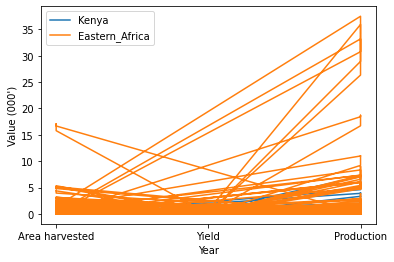

In [4]:
kenya = data[data.Area == "Kenya"]
Eastern_Africa = data[data.Area == "Eastern Africa"]
plt.plot(kenya.Element, kenya.Value / 10**6)
plt.plot(Eastern_Africa.Element, Eastern_Africa.Value / 10**6) 
plt.legend(["Kenya", "Eastern_Africa"])
plt.xlabel("Year")
plt.ylabel("Value (000')")
plt.show()
## Blue is kenya While orange is Eastern Africa

### Question 2: What Is The Total Number of Tonnes of Crops Procuced In the 4years

In [5]:
Production = (data["Element"] == "Production")
data.loc[Production]["Value"].sum()

971981022.0

### Question 3: Which Is The Year With the Most Production, Area Harvested and Yields Rate In Both Kenya and Eastern Africa

<AxesSubplot:xlabel='Element,Year'>

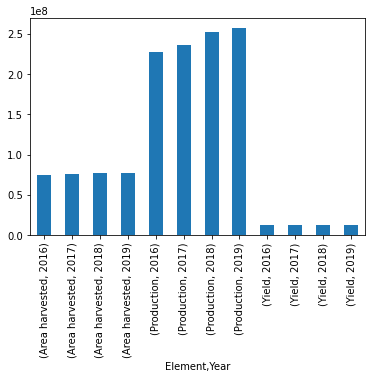

In [6]:
data.groupby(["Element","Year"])["Value"].sum().head(50).plot.bar()

In [ ]:
### Question 4: TOTAL TONNES OF CROPS PRODUCED FOR THE 4 YEARS

In [7]:
Production = (data["Element"] == "Production")
data.loc[Production]["Value"].sum()

971981022.0

### Question 5: Production Data Kenya

In [8]:

filt = (data["Element"] == "Production") & (data["Area"] == "Kenya")


In [9]:
data.loc[filt,["Year","Value"]]

,Year,Value
8,2016,82.0
9,2017,82.0
10,2018,77.0
11,2019,78.0
20,2016,623.0
...,...,...
1011,2019,366200.0
1020,2016,12388.0
1021,2017,10417.0
1022,2018,9610.0


In [10]:
data.loc[filt,["Year","Value"]].sum()

Year       710160.0
Value    84215642.0
dtype: float64

In [ ]:
### MOST PRODUCED CROP IN KENYA

In [11]:
filt = (data["Element"] == "Production") & (data["Area"] == "Kenya")

<AxesSubplot:xlabel='Crop'>

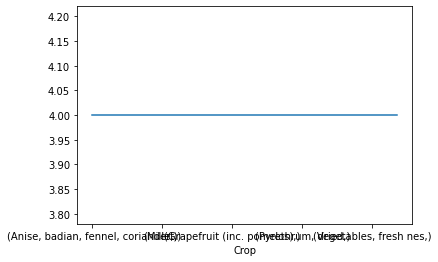

In [13]:
data.loc[filt, ["Crop"]].value_counts().sort_values(ascending=True).plot()

### Question 6: Production Data Eastern Africa

In [14]:
Crops = (data["Element"] == "Production") & (data["Area"] == "Eastern Africa")

<AxesSubplot:>

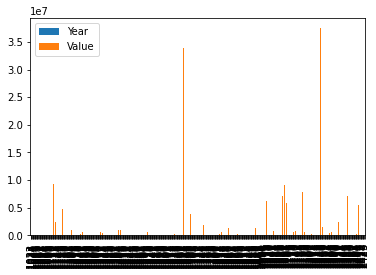

In [15]:
data.loc[Crops, ["Year", "Value"]].plot.bar()

In [16]:
data.loc[Crops, ["Year", "Value"]].sum()

Year        976470.0
Value    887765380.0
dtype: float64

In [ ]:
### MOST PRODUCED CROPS IN EASTERN AFRICA

In [17]:
Crops = (data["Element"] == "Production") & (data["Area"] == "Eastern Africa")

In [18]:
data.loc[Crops, ["Crop"]].value_counts().head(50)

Crop                                        
Anise, badian, fennel, coriander                4
Melonseed                                       4
Rapeseed                                        4
Pyrethrum, dried                                4
Pumpkins, squash and gourds                     4
Pulses nes                                      4
Potatoes                                        4
Plums and sloes                                 4
Plantains and others                            4
Pistachios                                      4
Pineapples                                      4
Pigeon peas                                     4
Pepper (piper spp.)                             4
Peas, green                                     4
Peas, dry                                       4
Pears                                           4
Peaches and nectarines                          4
Papayas                                         4
Oranges                                         4
Onion

### Amount of land Harvested in 'Ha'

In [19]:
Field = (data["Element"] == "Area harvested")

In [20]:
data.loc[Field, ["Value"]].sum()

Value    304446932.0
dtype: float64

In [ ]:
Area = (data["Area"] == "Kenya") & (data["Element"])
data.loc[Area]["Value"].value_counts().plot()

Area = (data["Area"] == "Eastern Africa") & (data["Element"])
data.loc[Area]["Value"].value_counts().plot()